In [1]:
%pylab

Using matplotlib backend: <object object at 0x7fc5daaba2e0>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import functions
import algorithms 
import optSolver
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
## The correct way to call a certain function in functions.py is as follows
# x0 = np.array([1.2,1.2])
# functions.rosen_func(x0)

In [4]:
## Define three class objects required in 'optSolver' and their attributes 

class Problem:
    def __init__(self,name,w0, X, y ,n,compute_f,compute_g,compute_pred):
        self.name = name
        self.w0 = w0
        self.n = n
        self.X = X
        self.y = y
        self.compute_f = compute_f
        self.compute_g = compute_g
        self.compute_pred = compute_pred
        
class Method:
    def __init__(self,name,step_type,constant_step_size):
        self.name = name
        self.step_type = step_type
        self.constant_step_size = constant_step_size
        
class Options:
    def __init__(self,term_tol = 1e-6, max_iterations = 1e3, batch_size = 3):
        self.term_tol = term_tol
        self.max_iterations = max_iterations
        self.batch_size = batch_size

In [5]:
import scipy.io as sp
mat_contents_mushroom = sp.loadmat("mushroom.mat")
X_test_mushroom = mat_contents_mushroom['X_test']
X_train_mushroom = mat_contents_mushroom['X_train']
y_test_mushroom = mat_contents_mushroom['y_test']
y_train_mushroom = mat_contents_mushroom['y_train']

mat_contents_australian = sp.loadmat("australian.mat")
X_test_australian = mat_contents_australian['X_test']
X_train_australian = mat_contents_australian['X_train']
y_test_australian = mat_contents_australian['y_test']
y_train_australian = mat_contents_australian['y_train']
print(shape(X_train_mushroom))

(3850, 112)


# Australian

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


x1 =  [[ 0.00019486  0.00019486  0.00019486 ...  0.00019486  0.00019486
   0.00019486]
 [-0.0170478  -0.0170478  -0.0170478  ... -0.0170478  -0.0170478
  -0.0170478 ]
 [ 0.0070505   0.0070505   0.0070505  ...  0.0070505   0.0070505
   0.0070505 ]
 ...
 [ 0.03874267  0.03874267  0.03874267 ...  0.03874267  0.03874267
   0.03874267]
 [ 0.02089009  0.02089009  0.02089009 ...  0.02089009  0.02089009
   0.02089009]
 [-0.01498916 -0.01498916 -0.01498916 ... -0.01498916 -0.01498916
  -0.01498916]] 
f1 =  0.15621669705821703 
iterations =  
k1 =  77056 
len(fk1) =  302 
k1/options.batch_size+1 =  302.0
x2 =  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan na

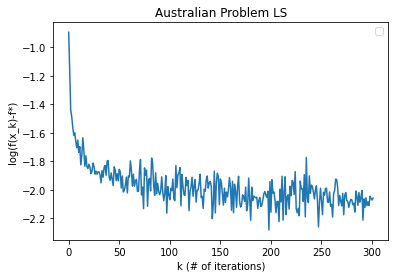

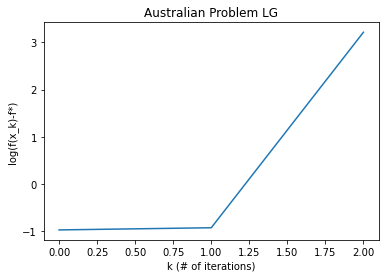

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


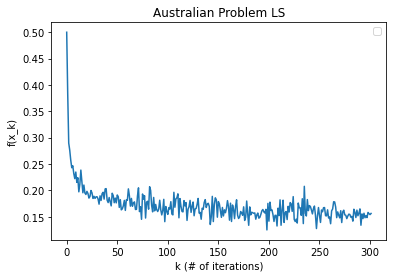

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


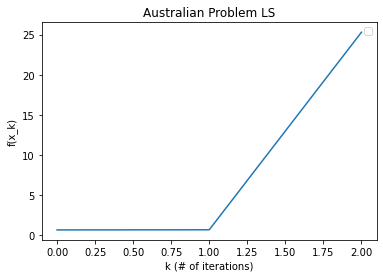

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


x1 =  [[ 1.64073878e-07  1.64073878e-07  1.64073878e-07 ...  1.64073878e-07
   1.64073878e-07  1.64073878e-07]
 [-1.05126481e-05 -1.05126481e-05 -1.05126481e-05 ... -1.05126481e-05
  -1.05126481e-05 -1.05126481e-05]
 [ 1.81171773e-06  1.81171773e-06  1.81171773e-06 ...  1.81171773e-06
   1.81171773e-06  1.81171773e-06]
 ...
 [ 3.17963098e-05  3.17963098e-05  3.17963098e-05 ...  3.17963098e-05
   3.17963098e-05  3.17963098e-05]
 [ 6.32184827e-06  6.32184827e-06  6.32184827e-06 ...  6.32184827e-06
   6.32184827e-06  6.32184827e-06]
 [-6.67078424e-06 -6.67078424e-06 -6.67078424e-06 ... -6.67078424e-06
  -6.67078424e-06 -6.67078424e-06]] 
f1 =  0.4996220987791681 
iterations =  
k1 =  77056 
len(fk1) =  302 
k1/options.batch_size+1 =  302.0
x2 =  [-0.00589049 -0.00589049 -0.00589049 -0.00589049 -0.00589049 -0.00589049
 -0.00589049 -0.00589049 -0.00589049 -0.00589049 -0.00589049 -0.00589049
 -0.00589049 -0.00589049 -0.00589049 -0.00589049 -0.00589049 -0.00589049
 -0.00589049 -0.00589049 -0.

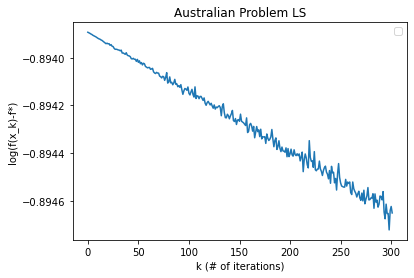

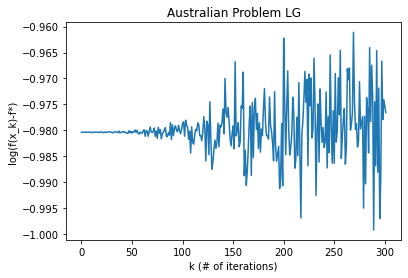

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


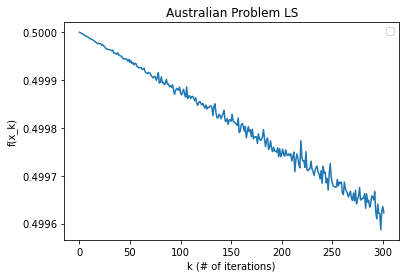

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


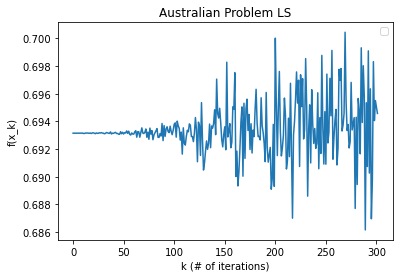

In [22]:
def Australian(method):
    f_star_LR_australian = 0.317975103687055
    f_star_LS_australian = 0.200746448253932
    X = X_train_mushroom
    y = y_train_mushroom
    w0 = np.transpose(np.zeros(len(X[0]), dtype = float))
#     w0 = np.transpose(np.zeros(len(X), dtype = float))
#     options = Options(1e-6, 20*len(X), 3)
    options = Options(1e-6, 20*len(X), 256)

#     f_star = functions.rosen_func(x_star)
    Aus_LLS = Problem('Australian',w0,X,y,len(w0),functions.least_square_func,functions.least_square_grad,functions.least_square_pred)
    Aus_LogReg = Problem('Australian',w0,X,y,len(w0),functions.logistic_func,functions.logistic_grad,functions.logistic_pred)
    x1, f1, xk1, fk1, k1, count1 = optSolver.optSolver_Fitkin_Graham(Aus_LLS, method, options)
    x2, f2, xk2, fk2, k2, count2 = optSolver.optSolver_Fitkin_Graham(Aus_LogReg, method, options)
    print("x1 = ", x1, "\nf1 = ", f1, "\niterations = ","\nk1 = ", k1,"\nlen(fk1) = ", len(fk1),"\nk1/options.batch_size+1 = ", k1/options.batch_size+1)
    print("x2 = ", x2, "\nf2 = ", f2, "\niterations = ","\nk2 = ", k2,"\nlen(fk2) = ", len(fk2),"\nk2/options.batch_size+1 = ", k2/options.batch_size+1)
    print("type(fk2) = ", type(np.array(fk2)),"type(f_star_LR_australian) = ", type(f_star_LR_australian))
    log_diff1 = np.log(np.array(fk1)) - f_star_LS_australian ; log_diff2 = np.log(np.array(fk2) - f_star_LR_australian)
    print("log_diff1 = ", log_diff1, "\nlog_diff2 = ", log_diff2)
    plt.xlabel('k (# of iterations)')
    plt.ylabel('log(f(x_k)-f*)')
    plt.title("Australian Problem LS")
    plt.legend()
    plt.plot(list(np.arange(0, k1/options.batch_size+1)), log_diff1, label = "LSS")
    plt.show()
    plt.xlabel('k (# of iterations)')
    plt.ylabel('log(f(x_k)-f*)')
    plt.title("Australian Problem LG")
    plt.plot(list(np.arange(0, k2/options.batch_size+1)), log_diff2, label = "LR")
    plt.show()
    plt.xlabel('k (# of iterations)')
    plt.ylabel('f(x_k)')
    plt.title("Australian Problem LS")
    plt.legend()
    plt.plot(list(np.arange(0, k1/options.batch_size+1)), fk1, label = "LSS")
    plt.show()
    plt.xlabel('k (# of iterations)')
    plt.ylabel('f(x_k)')
    plt.title("Australian Problem LS")
    plt.legend()
    plt.plot(list(np.arange(0, k2/options.batch_size+1)), fk2, label = "LR")
    plt.show()

    
# Australian(Method('GDStep','Constant',1e-4))
Australian(Method('StochasticGradient','Diminishing',1e-1))
Australian(Method('StochasticGradient','Constant',1e-6))
# Australian(Method('StochasticGradient','Modified',1e-4))
# Australian(Method('BFGS','Backtracking',1e-4))
# Australian(Method('L-BFGS_2','Two-loop',1e-4))

In [11]:
def Australian(method):
    f_star_LR_australian = 0.317975103687055
    f_star_LS_australian = 0.200746448253932
    X = X_train_mushroom
    y = y_train_mushroom
    w0 = np.transpose(np.zeros(len(X[0]), dtype = float))
#     w0 = np.transpose(np.zeros(len(X), dtype = float))
#     options = Options(1e-6, 20*len(X), 3)
    options = Options(1e-6, 20*len(X), 8)

#     f_star = functions.rosen_func(x_star)
    Aus_LLS = Problem('Australian',w0,X,y,len(w0),functions.least_square_func,functions.least_square_grad,functions.least_square_pred)
    Aus_LogReg = Problem('Australian',w0,X,y,len(w0),functions.logistic_func,functions.logistic_grad,functions.logistic_pred)
    x1, f1, xk1, fk1, k1, count1 = optSolver.optSolver_Fitkin_Graham(Aus_LLS, method, options)
    x2, f2, xk2, fk2, k2, count2 = optSolver.optSolver_Fitkin_Graham(Aus_LogReg, method, options)
    print("x1 = ", x1, "\nf1 = ", f1, "\niterations = ","\nk1 = ", k1,"\nlen(fk1) = ", len(fk1),"\nk1/3+1 = ", k1/3+1)
    print("x2 = ", x2, "\nf2 = ", f2, "\niterations = ","\nk2 = ", k2,"\nlen(fk2) = ", len(fk2),"\nk2/3+1 = ", k2/3+1)
    print("type(fk2) = ", type(np.array(fk2)),"type(f_star_LR_australian) = ", type(f_star_LR_australian))
    log_diff1 = np.log(np.array(fk1)) - f_star_LS_australian ; log_diff2 = np.log(np.array(fk2) - f_star_LR_australian)
    print("log_diff1 = ", log_diff1, "\n log_diff2 = ", log_diff2)
    plt.xlabel('k (# of iterations)')
    plt.ylabel('log(f(x_k)-f*)')
    plt.title("Australian Problem LS")
    plt.legend()
    plt.plot(list(np.arange(0, k1/8+1)), log_diff1, label = "LSS")
    plt.show()
    plt.xlabel('k (# of iterations)')
    plt.ylabel('log(f(x_k)-f*)')
    plt.title("Australian Problem LG")
    plt.plot(list(np.arange(0, k2/8+1)), log_diff2, label = "LR")
    plt.show()
    
Australian(Method('GDStep','Constant',1e-4))
# Australian(Method('GradientDescent','Diminishing',1e-4))
# Australian(Method('Gra','Constant',1e-4))
# Australian(Method('StochasticGradient','Modified',1e-4))
# Australian(Method('BFGS','Backtracking',1e-4))
# Australian(Method('L-BFGS_2','Two-loop',1e-4))

KeyboardInterrupt: 

x =  [1.0127633  1.02536825] 
f =  0.0001732227691922814 
count =  0
x =  [0.97277594 0.9460233 ] 
f =  0.0007484247354819688 
count =  0


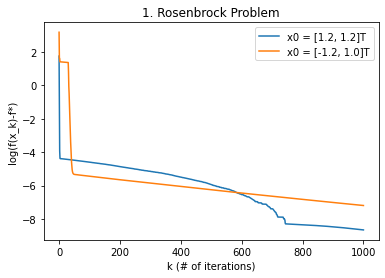

modified
modified
modified
modified
modified
modified
modified
modified
x =  [1.00000018 1.00000035] 
f =  3.226676189013061e-14 
count =  0
x =  [0.99999889 0.99999751] 
f =  8.51707498509082e-12 
count =  0


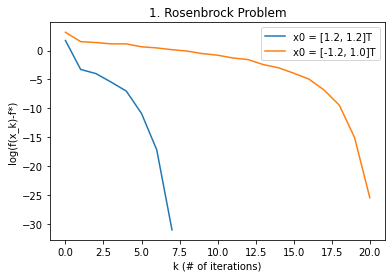

x =  [1.0560968 1.1152119] 
f =  0.0031485041455273787 
count =  0
x =  [1.32340887 1.75077974] 
f =  0.10463315078324992 
count =  0


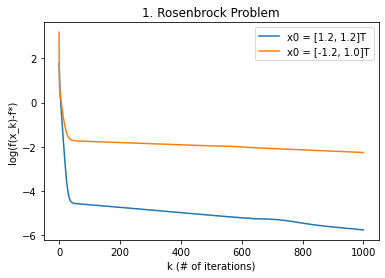

skipped l bfgs
x =  [1.0127633  1.02536825] 
f =  0.0001732227691922814 
count =  0
x =  [0.97277594 0.9460233 ] 
f =  0.0007484247354819688 
count =  0


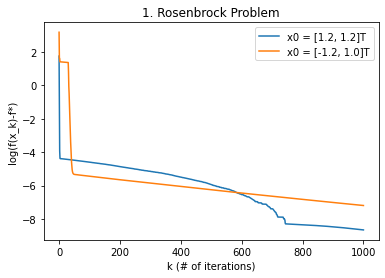

skipped l bfgs
x =  [1.0127633  1.02536825] 
f =  0.0001732227691922814 
count =  0
x =  [0.97277594 0.9460233 ] 
f =  0.0007484247354819688 
count =  0


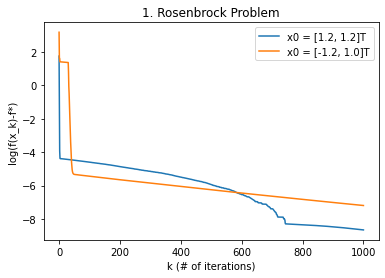

skipped l bfgs
x =  [1.0127633  1.02536825] 
f =  0.0001732227691922814 
count =  0
x =  [0.97277594 0.9460233 ] 
f =  0.0007484247354819688 
count =  0


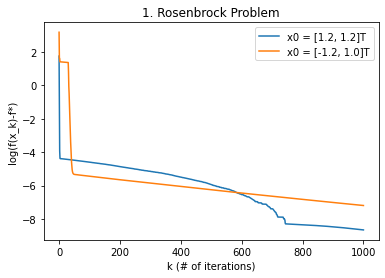

In [5]:
def Rosenbrock(method):
    options = Options(1e-6,1e3)
    x0_1 = np.array([1.2,1.2])
    x0_2 = np.array([-1.2,1])
    x_star = np.array([1,1])
    f_star = functions.rosen_func(x_star)
    problem1 = Problem('Rosenbrock',x0_1,len(x0_1),functions.rosen_func,functions.rosen_grad,functions.rosen_Hess)
    problem2 = Problem('Rosenbrock',x0_2,len(x0_2),functions.rosen_func,functions.rosen_grad,functions.rosen_Hess)
    x1, f1, xk1, fk1, k1, count1 = optSolver.optSolver_Fitkin_Graham(problem1, method, options)
    x2, f2, xk2, fk2, k2, count2 = optSolver.optSolver_Fitkin_Graham(problem2, method, options)
    print("x = ", x1, "\nf = ", f1, "\ncount = ", count1)
    print("x = ", x2, "\nf = ", f2, "\ncount = ", count2)
    log_diff1 = list(np.log(fk1 - f_star)) ; log_diff2 = list(np.log(fk2 - f_star))
    plt.plot(list(np.arange(0, k1+1)), log_diff1, label = "x0 = [1.2, 1.2]T")
    plt.plot(list(np.arange(0, k2+1)), log_diff2, label = "x0 = [-1.2, 1.0]T")
    plt.xlabel('k (# of iterations)')
    plt.ylabel('log(f(x_k)-f*)')
    plt.title("1. Rosenbrock Problem")
    plt.legend()
    plt.show()

    
Rosenbrock(Method('GradientDescent','Backtracking',1e-4))
Rosenbrock(Method('Newton','Modified',1e-4))
Rosenbrock(Method('BFGS','Backtracking',1e-4))
Rosenbrock(Method('L-BFGS_2','Two-loop',1e-4))
Rosenbrock(Method('L-BFGS_5','Two-loop',1e-4))
Rosenbrock(Method('L-BFGS_10','Two-loop',1e-4))

In [7]:
print(k1)

NameError: name 'k1' is not defined

# Function 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


x =  [2.99992093 0.49997988] 
f =  1.0069463050789388e-09 
count =  0


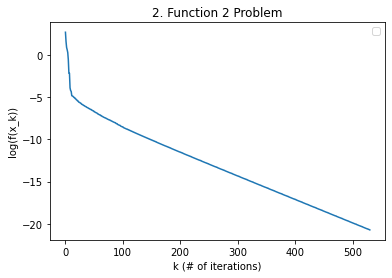

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


modified
modified
modified
modified
modified
modified
modified
x =  [2.99999994 0.5       ] 
f =  3.3978924862586816e-15 
count =  0


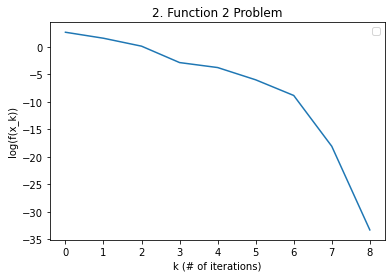

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


x =  [2.9999802  0.49999565] 
f =  7.01357005833707e-11 
count =  0


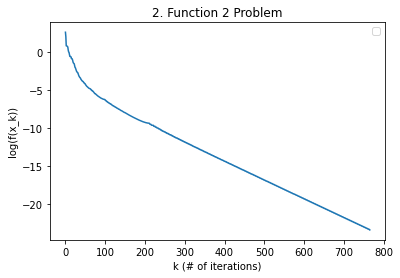

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


x =  [2.99992093 0.49997988] 
f =  1.0069463050789388e-09 
count =  0


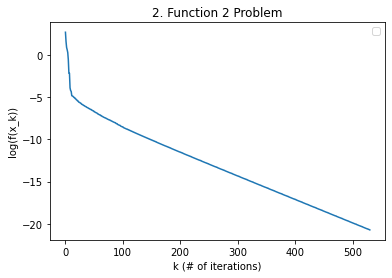

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


x =  [2.99992093 0.49997988] 
f =  1.0069463050789388e-09 
count =  0


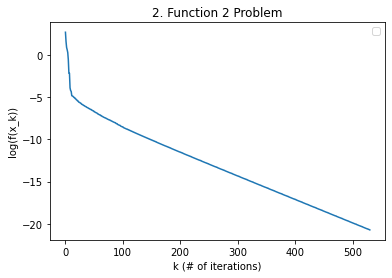

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


x =  [2.99992093 0.49997988] 
f =  1.0069463050789388e-09 
count =  0


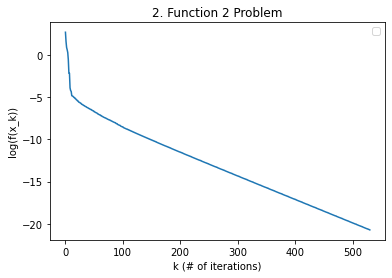

([array([1., 1.]),
  array([ 1.      , -0.734375]),
  array([3.13350264, 0.1397068 ]),
  array([2.84180681, 0.70952617]),
  array([2.91215742, 0.16416592]),
  array([2.70944005, 0.58202205]),
  array([2.76055238, 0.35203274]),
  array([2.71691123, 0.49453424]),
  array([2.74324465, 0.41035453]),
  array([2.74143479, 0.42873606]),
  array([2.8056327 , 0.42997044]),
  array([2.80265183, 0.44882993]),
  array([2.80937411, 0.4447104 ]),
  array([2.81197921, 0.45389917]),
  array([2.81592938, 0.44913732]),
  array([2.82389684, 0.45648795]),
  array([2.8308571, 0.4487051]),
  array([2.83105967, 0.45583372]),
  array([2.84101595, 0.45251535]),
  array([2.84133833, 0.45869021]),
  array([2.85053846, 0.45555168]),
  array([2.8508127 , 0.46139254]),
  array([2.85945204, 0.45800384]),
  array([2.85956391, 0.46395404]),
  array([2.86368748, 0.46194455]),
  array([2.86559952, 0.46742458]),
  array([2.86816268, 0.46424033]),
  array([2.87310608, 0.47022135]),
  array([2.87580025, 0.46610969]),
  arr

In [6]:
def Function2(method):
    x0 = np.array([1.0,1.0]) ; options = Options(1e-6,1e3)
    problem = Problem('Function2',x0,len(x0),functions.func2_func,functions.func2_grad,functions.func2_Hess)
    x, f, xk, fk, k, count = optSolver.optSolver_Fitkin_Graham(problem, method, options)
    print("x = ", x, "\nf = ", f, "\ncount = ", count)
    log_diff = list(np.log(fk))
    plt.plot(list(np.arange(0, k+1)), log_diff)
    plt.xlabel('k (# of iterations)')
    plt.ylabel('log(f(x_k))')
    plt.title("2. Function 2 Problem")
    plt.legend()
    plt.show()
    
    return xk, fk, k, count

Function2(Method('GradientDescent','Backtracking',1e-4))
Function2(Method('Newton','Modified',1e-4))
Function2(Method('BFGS','Backtracking',1e-4))
Function2(Method('L-BFGS_2','Two-loop',1e-4))
Function2(Method('L-BFGS_5','Two-loop',1e-4))
Function2(Method('L-BFGS_10','Two-loop',1e-4))

# Function 3

x1 =  [-1.24476337  1.        ] 
f1 =  -0.2055728089884078 
skipped iterations 1:  0
x2 =  [-1.24476485  1.          1.          1.          1.          1.
  1.          1.          1.          1.        ] 
f1 =  -0.2055728089930578 
skipped iterations 2:  0
x3 =  [-1.24476594  1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.    

  1.          1.          1.          1.        ] 
f1 =  -0.2055728089957351 
skipped iterations 3:  0


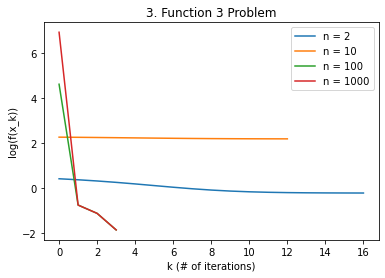

modified
modified
modified
modified
modified
modified
modified
modified
modified
modified
modified
modified
modified
modified
modified
modified
modified
modified
x1 =  [-1.24476995  0.99261379] 
f1 =  -0.20557280602372063 
skipped iterations 1:  0
x2 =  [-1.24476995  0.99261379  0.99261379  0.99261379  0.99261379  0.99261379
  0.99261379  0.99261379  0.99261379  0.99261379] 
f1 =  -0.20557278221281405 
skipped iterations 2:  0
x3 =  [-1.24476594  1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.   

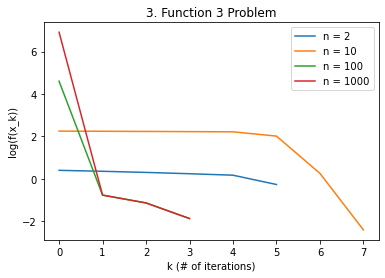

x1 =  [-1.24476455  0.99112053] 
f1 =  -0.20557280277566733 
skipped iterations 1:  0
x2 =  [-1.24476995  1.01115989  1.01115989  1.01115989  1.01115989  1.01115989
  1.01115989  1.01115989  1.01115989  1.01115989] 
f1 =  -0.20557266940123697 
skipped iterations 2:  0
x3 =  [-1.24476995  1.01115989  1.01115989  1.01115989  1.01115989  1.01115989
  1.01115989  1.01115989  1.01115989  1.01115989  1.01115989  1.01115989
  1.01115989  1.01115989  1.01115989  1.01115989  1.01115989  1.01115989
  1.01115989  1.01115989  1.01115989  1.01115989  1.01115989  1.01115989
  1.01115989  1.01115989  1.01115989  1.01115989  1.01115989  1.01115989
  1.01115989  1.01115989  1.01115989  1.01115989  1.01115989  1.01115989
  1.01115989  1.01115989  1.01115989  1.01115989  1.01115989  1.01115989
  1.01115989  1.01115989  1.01115989  1.01115989  1.01115989  1.01115989
  1.01115989  1.01115989  1.01115989  1.01115989  1.01115989  1.01115989
  1.01115989  1.01115989  1.01115989  1.01115989  1.01115989  1.0111

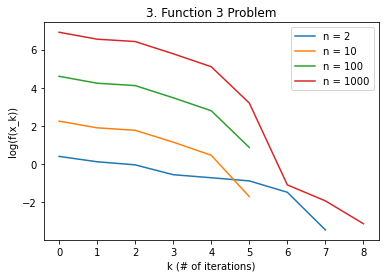

skipped l bfgs
skipped l bfgs
skipped l bfgs
skipped l bfgs
x1 =  [-1.24476337  1.        ] 
f1 =  -0.2055728089884078 
skipped iterations 1:  0
x2 =  [-1.24476485  1.          1.          1.          1.          1.
  1.          1.          1.          1.        ] 
f1 =  -0.2055728089930578 
skipped iterations 2:  0
x3 =  [-1.24476594  1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.         

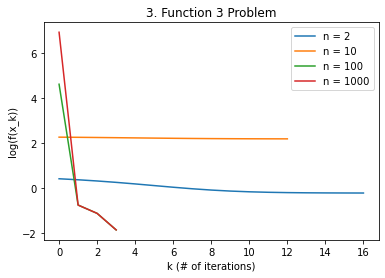

skipped l bfgs
skipped l bfgs
skipped l bfgs
skipped l bfgs
x1 =  [-1.24476337  1.        ] 
f1 =  -0.2055728089884078 
skipped iterations 1:  0
x2 =  [-1.24476485  1.          1.          1.          1.          1.
  1.          1.          1.          1.        ] 
f1 =  -0.2055728089930578 
skipped iterations 2:  0
x3 =  [-1.24476594  1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.         

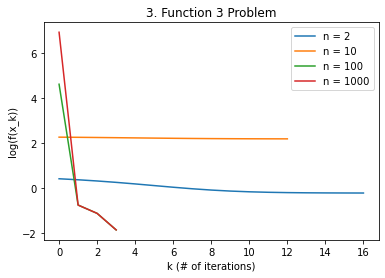

skipped l bfgs
skipped l bfgs
skipped l bfgs
skipped l bfgs
x1 =  [-1.24476337  1.        ] 
f1 =  -0.2055728089884078 
skipped iterations 1:  0
x2 =  [-1.24476485  1.          1.          1.          1.          1.
  1.          1.          1.          1.        ] 
f1 =  -0.2055728089930578 
skipped iterations 2:  0
x3 =  [-1.24476594  1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.         

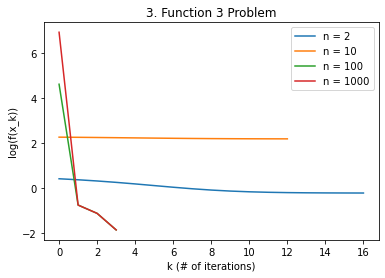

In [8]:
def Function3(method):
    n = [2, 10, 100, 1000]
    x0_1 = np.zeros(n[0]); x0_2 = np.zeros(n[1]); x0_3 = np.zeros(n[2]) ; x0_4 = np.zeros(n[3])
    x0_1[0] = 1; x0_2[0] = 1; x0_3[0] = 1 ; x0_4[0] = 1
    options = Options(1e-6,1e3)
    problem1 = Problem('Function3',x0_1,len(x0_1),functions.func3_func,functions.func3_grad,functions.func3_Hess)
    problem2 = Problem('Function3',x0_2,len(x0_2),functions.func3_func,functions.func3_grad,functions.func3_Hess)
    problem3 = Problem('Function3',x0_3,len(x0_3),functions.func3_func,functions.func3_grad,functions.func3_Hess)
    problem4 = Problem('Function3',x0_4,len(x0_4),functions.func3_func,functions.func3_grad,functions.func3_Hess)
    x1, f1, xk1, fk1, k1, count1 = optSolver.optSolver_Fitkin_Graham(problem1, method, options)
    x2, f2, xk2, fk2, k2, count2 = optSolver.optSolver_Fitkin_Graham(problem2, method, options)
    x3, f3, xk3, fk3, k3, count3 = optSolver.optSolver_Fitkin_Graham(problem3, method, options)
    x4, f4, xk4, fk4, k4, count4 = optSolver.optSolver_Fitkin_Graham(problem4, method, options)
    print("x1 = ", x1, "\nf1 = ", f1, "\nskipped iterations 1: ", count1)
    print("x2 = ", x2, "\nf1 = ", f2, "\nskipped iterations 2: ", count2)
    print("x3 = ", x3, "\nf1 = ", f3, "\nskipped iterations 3: ", count3)
    print("x4 = ", x4, "\nf1 = ", f4, "\nskipped iterations 3: ", count4)
    log1 = list(np.log(fk1)); log2 = list(np.log(fk2)) ; log3 = list(np.log(fk3)); log4 = list(np.log(fk4))
    plt.plot(list(np.arange(0,len(fk1))), log1, label = "n = 2")
    plt.plot(list(np.arange(0,len(fk2))), log2, label = "n = 10")
    plt.plot(list(np.arange(0,len(fk3))), log3, label = "n = 100")
    plt.plot(list(np.arange(0,len(fk4))), log4, label = "n = 1000")
    plt.xlabel('k (# of iterations)')
    plt.ylabel('log(f(x_k))')
    plt.title("3. Function 3 Problem")
    plt.legend()
    plt.show()
    
Function3(Method('GradientDescent','Backtracking',1e-4))
Function3(Method('Newton','Modified',1e-4))
Function3(Method('BFGS','Backtracking',1e-4))
Function3(Method('L-BFGS_2','Two-loop',1e-4))
Function3(Method('L-BFGS_5','Two-loop',1e-4))
Function3(Method('L-BFGS_10','Two-loop',1e-4))
